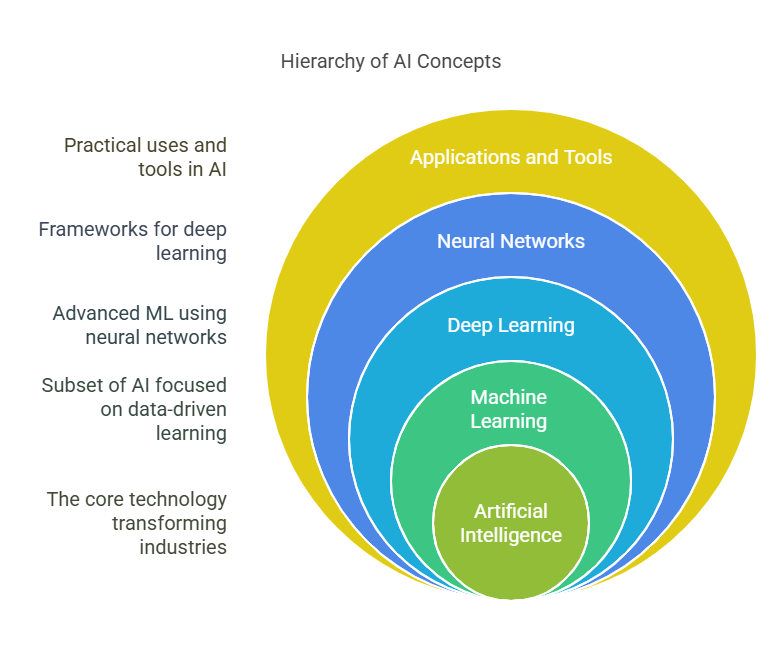

**Running LLMs Using Groq API and Hugging Face Llama**

This guide explores two methods for running Large Language Models (LLMs): the **Groq API** and **Hugging Face's Llama models**. The Groq API provides a cloud-based solution for deploying LLMs with high performance, leveraging optimized hardware for low latency and high throughput. Users can upload models, authenticate with an API key, and execute inference tasks on Groq servers. This approach is ideal for production-scale applications requiring scalability and efficiency, though it involves subscription costs and external dependencies.


In contrast, Hugging Face's Llama models enable local deployment, offering a flexible and cost-free alternative. By leveraging the Hugging Face Transformers library, users can load pre-trained Llama models, tokenize inputs, and generate outputs directly on their hardware. Optimization techniques, such as GPU acceleration or quantization, can enhance local performance. While this method is more resource-constrained and less scalable than the Groq API, it is well-suited for prototyping, research, and small-scale applications. Together, these tools provide versatile options for deploying LLMs tailored to specific needs and resources.

**1. Running LLMs Using the Groq API**

In [1]:
!pip install groq

In [2]:
import os

In [7]:
from groq import Groq

# client = Groq(
#     api_key=os.environ.get("GROQ_API_KEY"),
# )
api_key= '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'
client = Groq(
    api_key=api_key
)


chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Explain the importance of fast language models",
        }
    ],
    model="llama-3.3-70b-versatile",
    stream=False,
)

print(chat_completion.choices[0].message.content)

Fast language models are crucial in today's technology landscape, and their importance can be understood from several perspectives:

1. **Efficient Processing**: Fast language models enable rapid processing of vast amounts of text data. This is particularly important in applications where real-time responses are necessary, such as chatbots, virtual assistants, and sentiment analysis systems.
2. **Scalability**: As the amount of text data generated worldwide continues to grow exponentially, fast language models can handle large volumes of data without significant performance degradation. This scalability is essential for big data analytics, data mining, and other applications that rely on large-scale text processing.
3. **Improved User Experience**: Fast language models can provide instant feedback and responses to users, leading to a better user experience. This is particularly important in applications like language translation, text summarization, and content generation, where users 

**2. Running Llama Models Locally Using Hugging Face**

In [11]:

!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: fineGrained).
The token `qwen` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate whe

In [13]:
# Use a pipeline as a high-level helper
from transformers import pipeline

messages = [
    {"role": "user", "content": "Who are you?"},
]
pipe = pipeline("text-generation", model="google/gemma-2-2b-it")
pipe(messages)

config.json:   0%|          | 0.00/838 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/241M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/47.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

Device set to use cuda:0
The 'batch_size' attribute of HybridCache is deprecated and will be removed in v4.49. Use the more precisely named 'self.max_batch_size' attribute instead.


[{'generated_text': [{'role': 'user', 'content': 'Who are you?'},
   {'role': 'assistant',
    'content': "I am Gemma, an open-weights AI assistant. I'm a large language model, trained"}]}]

In [2]:
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM

# Define messages for input
messages = [
    {"role": "user", "content": "Who are you?"}
]

# Use pipeline as a high-level helper
model_name = "nvidia/Llama-3.1-Nemotron-70B-Instruct-HF"
pipe = pipeline("text-generation", model=model_name, tokenizer=model_name)

# Extract content for the pipeline
input_text = messages[0]["content"]

# Generate response
response = pipe(input_text, max_length=50, num_return_sequences=1)
print("Pipeline Response:", response)

# Load model and tokenizer directly for advanced usage
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Tokenize input manually
inputs = tokenizer(input_text, return_tensors="pt")

# Generate using the model directly
outputs = model.generate(**inputs, max_length=50)
decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Direct Model Response:", decoded_output)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/930 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/59.6k [00:00<?, ?B/s]

model-00001-of-00030.safetensors:   0%|          | 0.00/4.58G [00:00<?, ?B/s]

model-00002-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00003-of-00030.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00030.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00005-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00006-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00007-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00008-of-00030.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt

